In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/appliedcode/mthree-c422/refs/heads/main/Exercises/day-5/Decision%20Tree/salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [3]:
y = df['salary_more_then_100k']
inputs = df.drop(['salary_more_then_100k'], axis =1)
inputs.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = inputs.copy()
X['company'] = le.fit_transform(inputs['company'])
X['job'] = le.fit_transform(inputs['job'])
X['degree'] = le.fit_transform(inputs['degree'])
X.head()

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


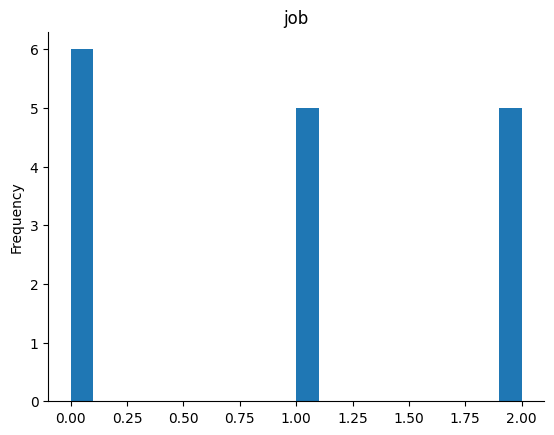

In [5]:
# @title job

from matplotlib import pyplot as plt
X['job'].plot(kind='hist', bins=20, title='job')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

In [7]:
model.score(X, y)

1.0

In [8]:
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(
    'ignore',
    message='X does not have valid feature names',
    category=UserWarning
)
# now no warning
model.predict([[2,0,1]])

array([1])

Trying with diff attributes


In [9]:
# Example: Try different combinations
model.predict([[2, 1, 1]])  # change job
model.predict([[0, 0, 0]])  # change company

array([0])

In [10]:
print("Company encoding:", dict(zip(le.fit(inputs['company']).classes_, le.fit_transform(inputs['company']))))
print("Job encoding:", dict(zip(le.fit(inputs['job']).classes_, le.fit_transform(inputs['job']))))
print("Degree encoding:", dict(zip(le.fit(inputs['degree']).classes_, le.fit_transform(inputs['degree']))))


Company encoding: {'abc pharma': np.int64(2), 'facebook': np.int64(2), 'google': np.int64(2)}
Job encoding: {'business manager': np.int64(2), 'computer programmer': np.int64(2), 'sales executive': np.int64(0)}
Degree encoding: {'bachelors': np.int64(0), 'masters': np.int64(1)}


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print("Training score:", model.score(X_train, y_train))
print("Test score:", model.score(X_test, y_test))


Training score: 1.0
Test score: 0.6


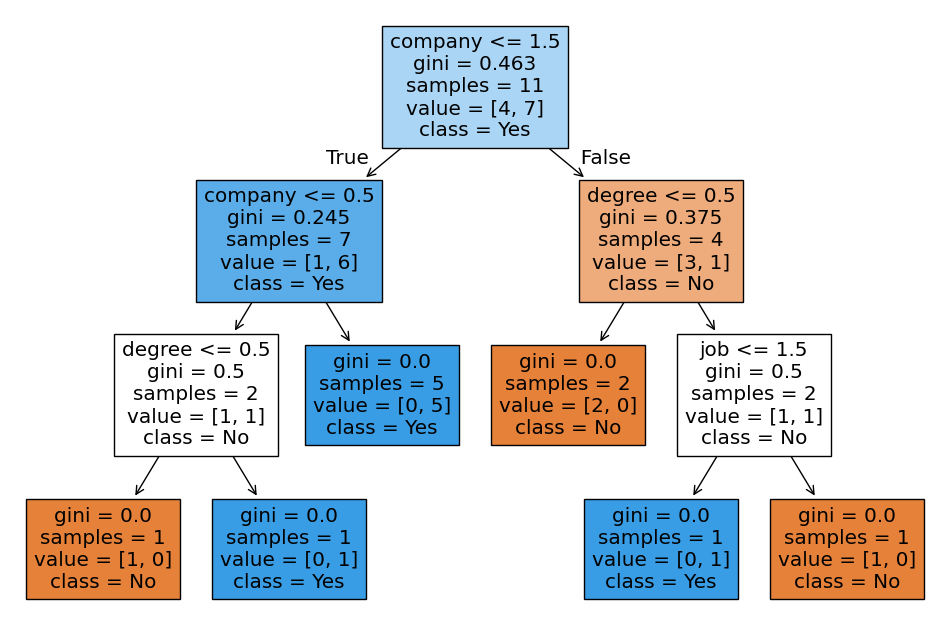

In [12]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=['company', 'job', 'degree'], class_names=['No', 'Yes'], filled=True)
plt.show()
